# Analysis of scenarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
scenario_list = pd.read_csv('scenario_list_test_3.csv', index_col='Scenario')
scenario_results = pd.read_csv('scenario_results_test_3.csv', low_memory=False, index_col=0)

# Merge on index
data = pd.merge(scenario_list, scenario_results, left_index=True, right_index=True)
data.to_csv('full_scenarios_and_results.csv', index_label=True)

# Remove rows from data and scenario list with process_time_ambulance_response = 0
scenario_list = scenario_list[scenario_list['process_time_ambulance_response'] != 0]
data = data[data['process_time_ambulance_response'] != 0]

# Ste max pandas display rows to 100
pd.set_option('display.max_rows', 100)
data.head().T

Scenario,0,1,2,3,4
process_time_call_ambulance,0.00000,0.00000,0.00000,0.00000,0.00000
process_time_ambulance_response,15.00000,15.00000,15.00000,15.00000,15.00000
process_ambulance_on_scene_duration,20.00000,20.00000,20.00000,20.00000,20.00000
process_msu_dispatch,0.00000,0.00000,0.00000,0.00000,0.00000
process_msu_thrombolysis,15.00000,15.00000,15.00000,15.00000,15.00000
process_msu_on_scene_post_thrombolysis,10.00000,10.00000,10.00000,10.00000,10.00000
process_time_arrival_to_needle,30.00000,30.00000,30.00000,30.00000,30.00000
transfer_time_delay,30.00000,30.00000,30.00000,30.00000,30.00000
process_time_arrival_to_puncture,30.00000,30.00000,30.00000,45.00000,45.00000
process_time_msu_arrival_to_puncture,30.00000,45.00000,60.00000,30.00000,45.00000


In [3]:
# Add net benefit column
prop_nlvo = 0.7
prop_lvo = 1 - prop_nlvo

# Utility

data['drip_ship_utility_shift'] = (
    (data['nlvo_drip_ship_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_drip_ship_ivt_mt_utility_shift'] * prop_lvo))

data['mothership_utility_shift'] = (
    (data['nlvo_mothership_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_utility_shift'] * prop_lvo))

data['msu_utility_shift'] = (
    (data['nlvo_msu_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_utility_shift'] * prop_lvo))

data['msu_net_utility_benefit'] = data['msu_utility_shift'] - data['drip_ship_utility_shift']

# Get proportions mRS 0-2 for each scenario
data['drip_ship_mrs_0-2'] = (
    (data['nlvo_drip_ship_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_drip_ship_mt_mrs_0-2'] * prop_lvo))

data['mothership_mrs_0-2'] = (
    (data['nlvo_mothership_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_mrs_0-2'] * prop_lvo))

data['msu_mrs_0-2'] = (
    (data['nlvo_msu_ivt_mrs_0-2'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_mrs_0-2'] * prop_lvo))

data['msu_mrs_0-2_benefit'] = data['msu_mrs_0-2'] - data['drip_ship_mrs_0-2']




In [4]:
list(data)

['process_time_call_ambulance',
 'process_time_ambulance_response',
 'process_ambulance_on_scene_duration',
 'process_msu_dispatch',
 'process_msu_thrombolysis',
 'process_msu_on_scene_post_thrombolysis',
 'process_time_arrival_to_needle',
 'transfer_time_delay',
 'process_time_arrival_to_puncture',
 'process_time_msu_arrival_to_puncture',
 'nearest_ivt_time',
 'nearest_mt_time',
 'transfer_time',
 'nearest_msu_time',
 'Admissions',
 'England',
 'drip_ship_ivt_time',
 'drip_ship_mt_time',
 'nlvo_no_treatment_mrs_0-2',
 'nlvo_no_treatment_utility',
 'lvo_no_treatment_mrs_0-2',
 'lvo_no_treatment_utility',
 'nlvo_drip_ship_ivt_mrs_0-2',
 'nlvo_drip_ship_ivt_mrs_shift',
 'nlvo_drip_ship_ivt_utility',
 'nlvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_ivt_mrs_0-2',
 'lvo_drip_ship_ivt_mrs_shift',
 'lvo_drip_ship_ivt_utility',
 'lvo_drip_ship_ivt_utility_shift',
 'lvo_drip_ship_mt_mrs_0-2',
 'lvo_drip_ship_mt_mrs_shift',
 'lvo_drip_ship_mt_utility',
 'lvo_drip_ship_mt_utility_shift',
 'lv

## Create summary results

In [5]:
results = scenario_list.copy(deep=True)

results.head()
results['nlvo_msu_ivt_utility_benefit'] = data['nlvo_msu_ivt_utility'] - data['nlvo_drip_ship_ivt_utility']
results['lvo_msu_ivt_utility_benefit'] = data['lvo_msu_ivt_utility'] - data['lvo_drip_ship_ivt_utility']
results['lvo_msu_ivt_mt_utility_benefit'] = data['lvo_msu_ivt_mt_utility'] - data['lvo_drip_ship_ivt_mt_utility']
results['nlvo_msu_ivt_mrs_0-2_benefit'] = data['nlvo_msu_ivt_mrs_0-2'] - data['nlvo_drip_ship_ivt_mrs_0-2']
results['lvo_msu_ivt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mrs_0-2'] - data['lvo_drip_ship_ivt_mrs_0-2']
results['lvo_msu_ivt_mt_mrs_0-2_benefit'] = data['lvo_msu_ivt_mt_mrs_0-2'] - data['lvo_drip_ship_ivt_mt_mrs_0-2']
results['drip_ship_utility_shift'] = data['drip_ship_utility_shift']
results['mothership_utility_shift'] = data['mothership_utility_shift']
results['msu_utility_shift'] = data['msu_utility_shift']
results['msu_net_utility_benefit'] = data['msu_net_utility_benefit']
results['msu_net_mrs_0-2_benefit'] = data['msu_mrs_0-2_benefit']

results.to_csv('scenario_1_results_summary.csv', index_label='Scenario')


In [6]:
results.head().T

Scenario,0,1,2,3,4
process_time_call_ambulance,0.000000,0.000000,0.000000,0.000000,0.000000
process_time_ambulance_response,15.000000,15.000000,15.000000,15.000000,15.000000
process_ambulance_on_scene_duration,20.000000,20.000000,20.000000,20.000000,20.000000
process_msu_dispatch,0.000000,0.000000,0.000000,0.000000,0.000000
process_msu_thrombolysis,15.000000,15.000000,15.000000,15.000000,15.000000
process_msu_on_scene_post_thrombolysis,10.000000,10.000000,10.000000,10.000000,10.000000
process_time_arrival_to_needle,30.000000,30.000000,30.000000,30.000000,30.000000
transfer_time_delay,30.000000,30.000000,30.000000,30.000000,30.000000
process_time_arrival_to_puncture,30.000000,30.000000,30.000000,45.000000,45.000000
process_time_msu_arrival_to_puncture,30.000000,45.000000,60.000000,30.000000,45.000000


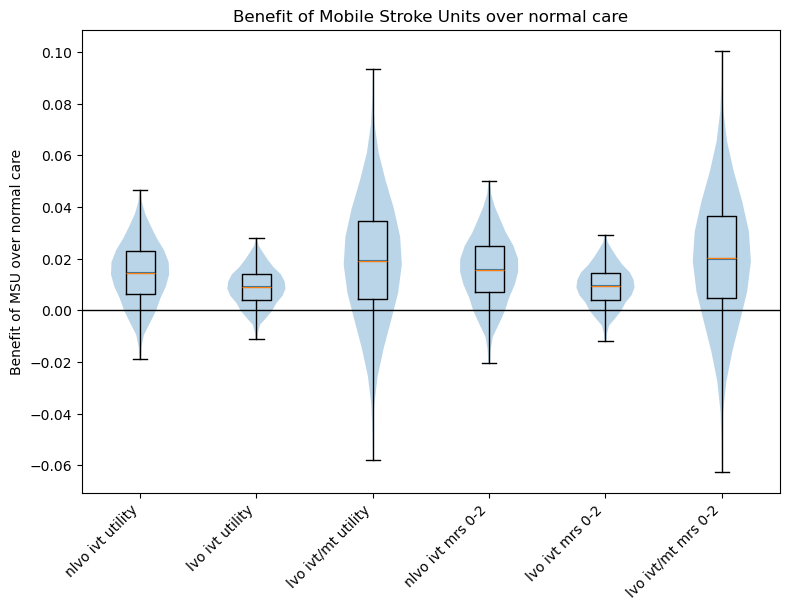

In [7]:
# Define results columns
results_cols = [
    'nlvo_msu_ivt_utility_benefit',
    'lvo_msu_ivt_utility_benefit',
    'lvo_msu_ivt_mt_utility_benefit',
    'nlvo_msu_ivt_mrs_0-2_benefit',
    'lvo_msu_ivt_mrs_0-2_benefit',
    'lvo_msu_ivt_mt_mrs_0-2_benefit'
]

rename_dict = {
        
    'nlvo_msu_ivt_utility_benefit':'nlvo ivt utility',
    'lvo_msu_ivt_utility_benefit': 'lvo ivt utility',
    'lvo_msu_ivt_mt_utility_benefit': 'lvo ivt/mt utility',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'nlvo ivt mrs 0-2',
    'lvo_msu_ivt_mrs_0-2_benefit': 'lvo ivt mrs 0-2',
    'lvo_msu_ivt_mt_mrs_0-2_benefit': 'lvo ivt/mt mrs 0-2',
}

# Plot violin plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.violinplot(results[results_cols], showextrema=False, showmeans=True, points=15)
# Add boxplot
ax.boxplot(results[results_cols], positions=np.arange(1, len(results_cols)+1), widths=0.25, whis=100)
# Add x-axis labels
ax.set_xticks(np.arange(1, len(results_cols)+1))
# Set labels using rename dict
ax.set_xticklabels([rename_dict[col] for col in results_cols])
plt.xticks(rotation=45, ha='right')
# Add a line at y=0
plt.axhline(0, color='black', lw=1)
# Add labels
plt.ylabel('Benefit of MSU over normal care')
plt.tight_layout()
plt.title('Benefit of Mobile Stroke Units over normal care')
plt.savefig('scenario_1_results_benefit.png', dpi=300, bbox_inches='tight')


plt.show()

## How many scenarios give no benefit of MSU over normal care?

In [8]:
df_no_benefit = pd.DataFrame(
    columns=['total_scenarios_with_no_benefit_of_msu_over_normal_care', 'prop_scenarios_with_no_benefit_of_msu_over_normal_care',],
    index=results_cols
)

for rc in results_cols:
    n_scen_no_benefit = (results[rc] <= 0.0).sum()
    prop_scen_no_benefit = n_scen_no_benefit / len(results)
    # Store in the results dataframe:
    df_no_benefit.loc[rc, 'total_scenarios_with_no_benefit_of_msu_over_normal_care'] = n_scen_no_benefit
    df_no_benefit.loc[rc, 'prop_scenarios_with_no_benefit_of_msu_over_normal_care'] = prop_scen_no_benefit

In [9]:
df_no_benefit

,total_scenarios_with_no_benefit_of_msu_over_normal_care,prop_scenarios_with_no_benefit_of_msu_over_normal_care
nlvo_msu_ivt_utility_benefit,6264,0.134259
lvo_msu_ivt_utility_benefit,4320,0.092593
lvo_msu_ivt_mt_utility_benefit,9700,0.207905
nlvo_msu_ivt_mrs_0-2_benefit,6264,0.134259
lvo_msu_ivt_mrs_0-2_benefit,4320,0.092593
lvo_msu_ivt_mt_mrs_0-2_benefit,9700,0.207905


## Which types of scenario give no benefit of MSU over normal care?

Combine the input times into groups: times that affect both usual care and MSU, times that affect usual care only, and times that affect MSU only.

In [10]:
results['time_to_ivt_without_travel_normal_care'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_time_ambulance_response'],
    results['process_ambulance_on_scene_duration'],
    results['process_time_arrival_to_needle'],
], axis=0)
results['time_to_mt_with_transfer_without_travel_normal_care'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_time_ambulance_response'],
    results['process_ambulance_on_scene_duration'],
    results['transfer_time_delay'],
    results['process_time_arrival_to_puncture'],
], axis=0)
results['time_to_mt_without_transfer_without_travel_normal_care'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_time_ambulance_response'],
    results['process_ambulance_on_scene_duration'],
    results['process_time_arrival_to_puncture'],
], axis=0)

In [11]:
results['time_to_ivt_without_travel_msu'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_msu_dispatch'],
    results['process_msu_thrombolysis'],
], axis=0)
results['time_to_mt_without_travel_msu'] = np.sum([
    results['process_time_call_ambulance'],
    results['process_msu_dispatch'],
    results['process_msu_thrombolysis'],
    results['process_msu_on_scene_post_thrombolysis'],
    results['process_time_msu_arrival_to_puncture'],
], axis=0)

In [12]:
results.T

Scenario,0,1,2,3,4,5,6,7,8,9,...,46646,46647,46648,46649,46650,46651,46652,46653,46654,46655
process_time_call_ambulance,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
process_time_ambulance_response,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
process_ambulance_on_scene_duration,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
process_msu_dispatch,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
process_msu_thrombolysis,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
process_msu_on_scene_post_thrombolysis,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
process_time_arrival_to_needle,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
transfer_time_delay,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,60.000000,...,60.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
process_time_arrival_to_puncture,30.000000,30.000000,30.000000,45.000000,45.000000,45.000000,60.000000,60.000000,60.000000,30.000000,...,60.000000,30.000000,30.000000,30.000000,45.000000,45.000000,45.000000,60.000000,60.000000,60.000000
process_time_msu_arrival_to_puncture,30.000000,45.000000,60.000000,30.000000,45.000000,60.000000,30.000000,45.000000,60.000000,30.000000,...,60.000000,30.000000,45.000000,60.000000,30.000000,45.000000,60.000000,30.000000,45.000000,60.000000


In [13]:
time_cols = [
    'time_to_ivt_without_travel_normal_care',
    'time_to_mt_with_transfer_without_travel_normal_care',
    'time_to_mt_without_transfer_without_travel_normal_care',
    'time_to_ivt_without_travel_msu',
    'time_to_mt_without_travel_msu',
]

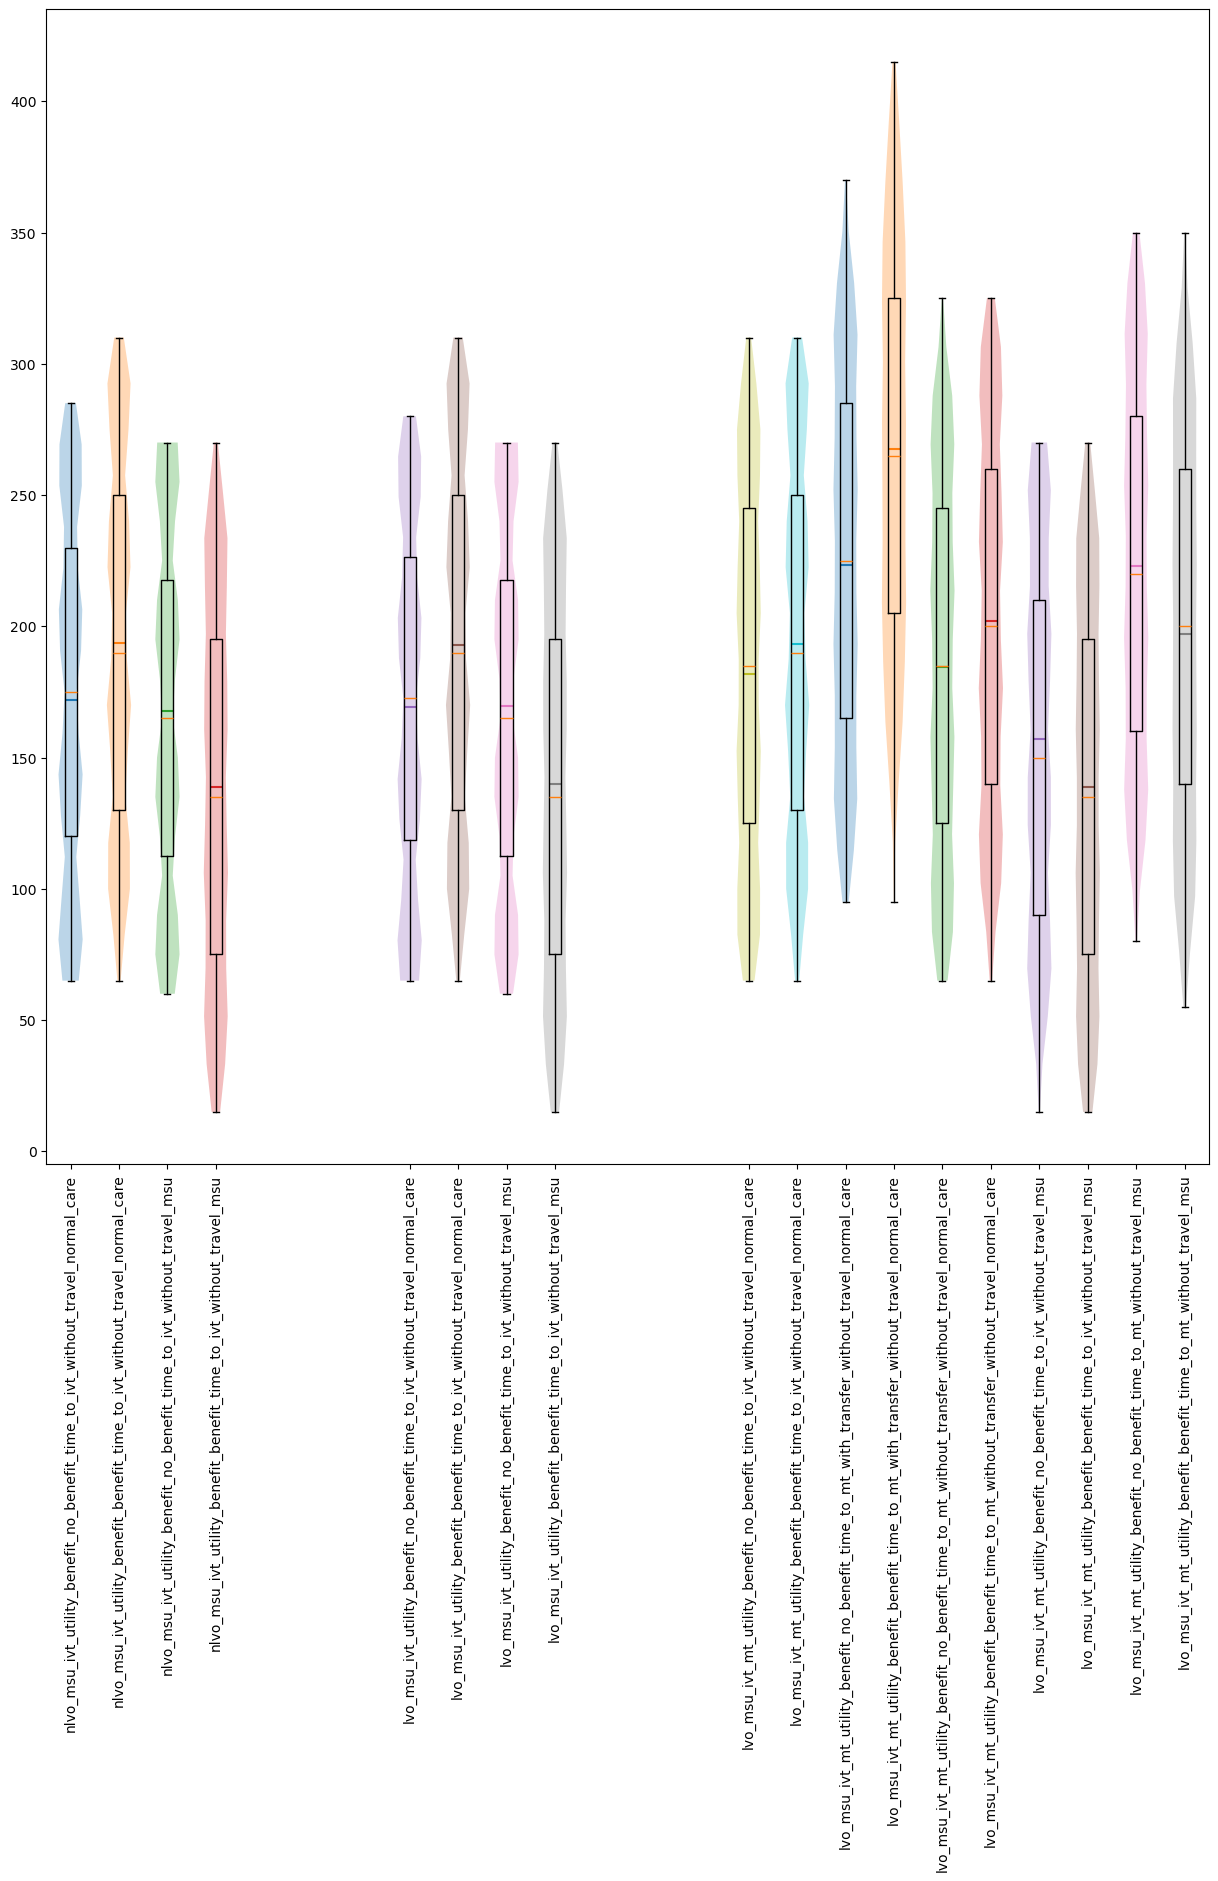

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))

xlabels = []
x = 0
for rc in results_cols[:3]:
    masks = {
        'no_benefit': (results[rc] <= 0.0),
        'benefit': ~(results[rc] <= 0.0),
    }

    time_cols_here = time_cols if 'mt' in rc else [c for c in time_cols if 'mt' not in c]
    
    for time_col in time_cols_here:
        for mask_name, mask in masks.items():
            vals = results.loc[mask, time_col]
            
            ax.violinplot(vals, positions=[x], showextrema=False, showmeans=True, points=15)
            # Add boxplot
            ax.boxplot(vals, positions=[x], widths=0.25, showfliers=False)

            xlabel = f'{rc}_{mask_name}_{time_col}'
            xlabels.append(xlabel)
            x+=1
    x+=3

ax.set_xticklabels(xlabels, rotation=90)
plt.show()

## How do input parameters affect the benefit of MSU over normal care?

## Net benefit

0.14615	0.25552	0.59833 (haem: LVO: nLVO, based on SSNAP)
30% LVO and 70% nLVO

In [15]:
prop_nlvo = 0.7
prop_lvo = 1 - prop_nlvo

data['drip_ship_utility_shift'] = (
    (data['nlvo_drip_ship_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_drip_ship_ivt_mt_utility_shift'] * prop_lvo))

data['mothership_utility_shift'] = (
    (data['nlvo_mothership_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_mothership_ivt_mt_utility_shift'] * prop_lvo))

data['msu_utility_shift'] = (
    (data['nlvo_msu_ivt_utility_shift'] * prop_nlvo) +
    (data['lvo_msu_ivt_mt_utility_shift'] * prop_lvo))

data['msu_benefit'] = data['msu_utility_shift'] - data['drip_ship_utility_shift']

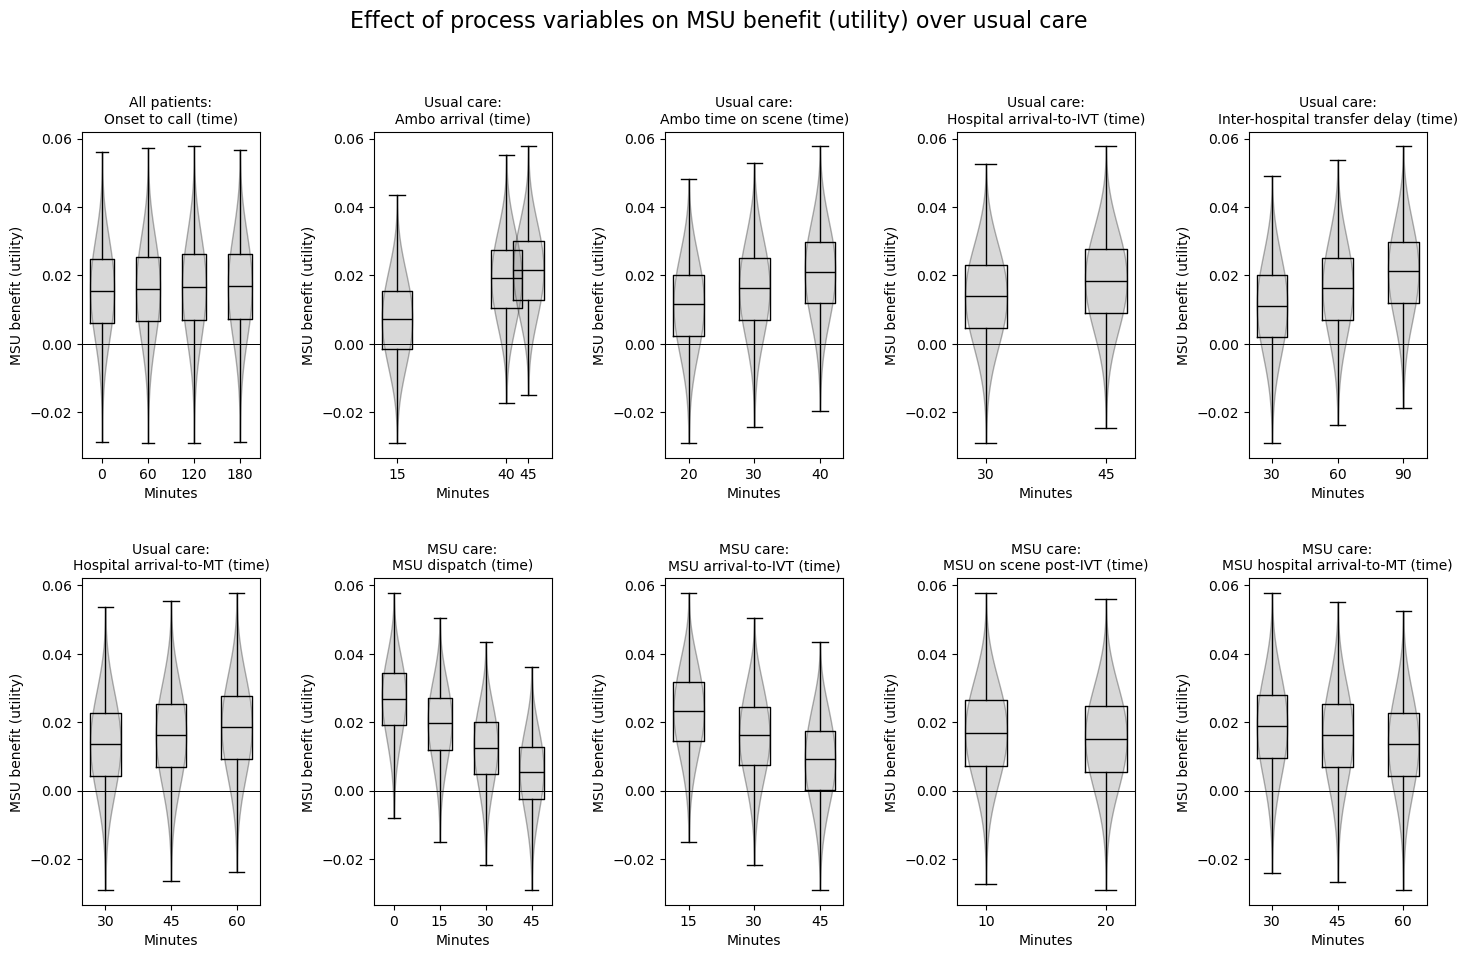

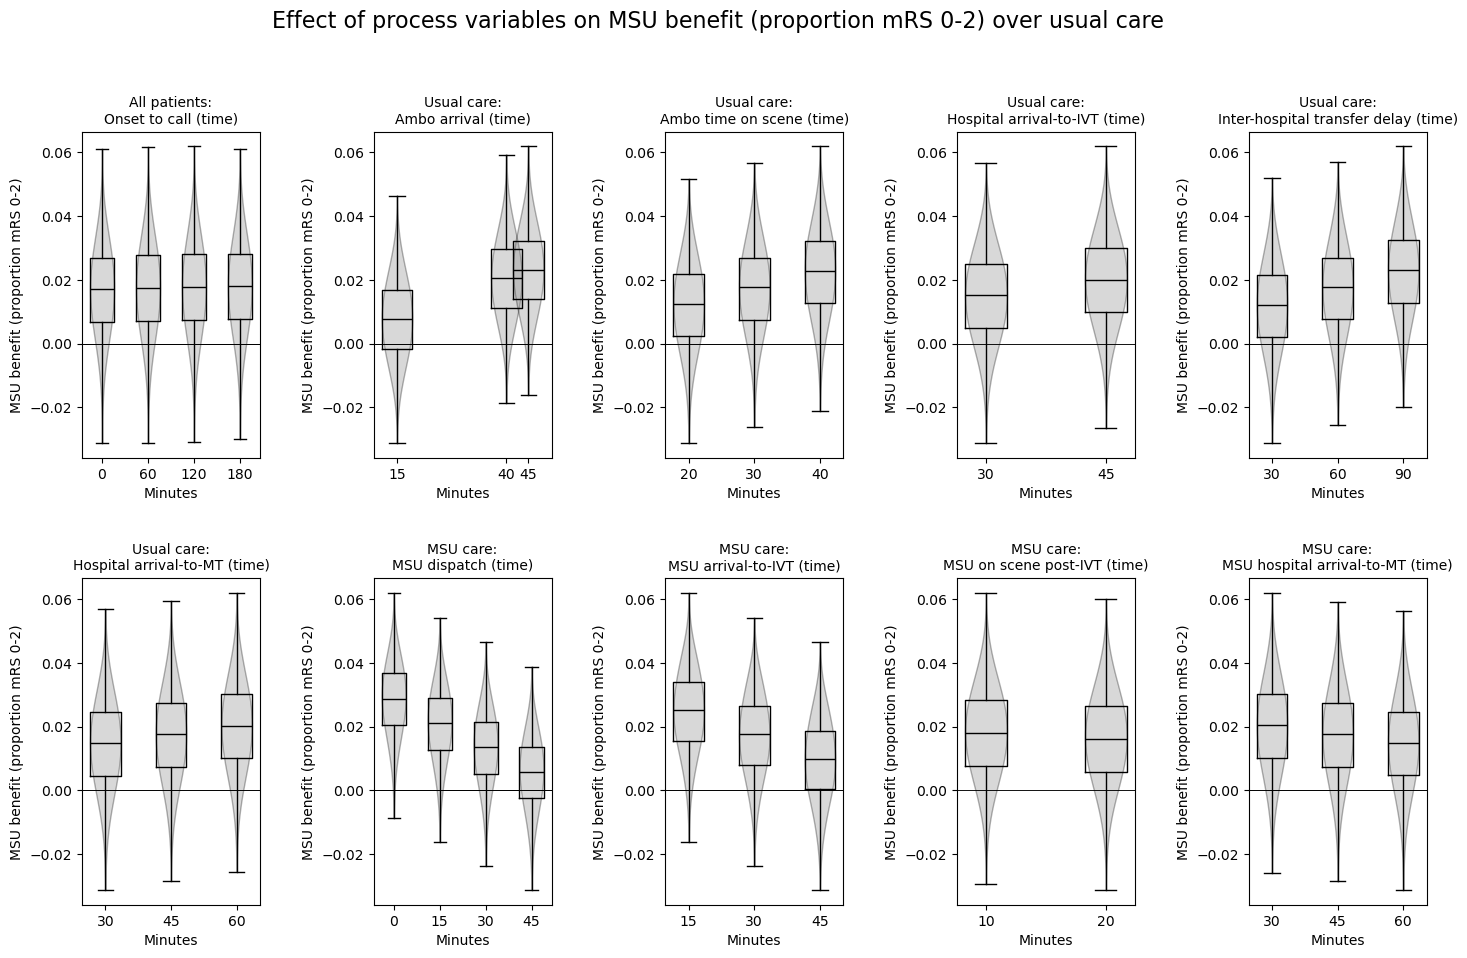

In [16]:
variables = ['process_time_call_ambulance',
 'process_time_ambulance_response',
 'process_ambulance_on_scene_duration',
 'process_time_arrival_to_needle',
 'transfer_time_delay',
 'process_time_arrival_to_puncture',
 'process_msu_dispatch',
 'process_msu_thrombolysis',
 'process_msu_on_scene_post_thrombolysis',
 'process_time_msu_arrival_to_puncture',
]


rename_var_dict = {
'process_time_call_ambulance':'All patients:\nOnset to call (time)',
'process_time_ambulance_response':'Usual care:\nAmbo arrival (time)',
'process_ambulance_on_scene_duration':'Usual care:\nAmbo time on scene (time)',
'process_msu_dispatch':'MSU care:\nMSU dispatch (time)',
'process_msu_thrombolysis':'MSU care:\nMSU arrival-to-IVT (time)',
'process_msu_on_scene_post_thrombolysis':'MSU care:\nMSU on scene post-IVT (time)',
'process_time_arrival_to_needle':'Usual care:\nHospital arrival-to-IVT (time)',
'transfer_time_delay':'Usual care:\nInter-hospital transfer delay (time)',
'process_time_arrival_to_puncture':'Usual care:\nHospital arrival-to-MT (time)',
'process_time_msu_arrival_to_puncture':'MSU care:\nMSU hospital arrival-to-MT (time)',
}

results_cols = [
    'msu_net_utility_benefit',
    'msu_net_mrs_0-2_benefit',
]

rename_result_dict = {
        
    'nlvo_msu_ivt_utility_benefit':'nlvo ivt utility',
    'lvo_msu_ivt_utility_benefit': 'lvo ivt utility',
    'lvo_msu_ivt_mt_utility_benefit': 'lvo ivt/mt utility',
    'nlvo_msu_ivt_mrs_0-2_benefit': 'nlvo ivt mrs 0-2',
    'lvo_msu_ivt_mrs_0-2_benefit': 'lvo ivt mrs 0-2',
    'lvo_msu_ivt_mt_mrs_0-2_benefit': 'lvo ivt/mt mrs 0-2',
    'msu_net_utility_benefit': 'MSU benefit (utility)',
    'msu_net_mrs_0-2_benefit': 'MSU benefit (proportion mRS 0-2)',
}

# For each result column, draw a violin of the effect of each variable




for i,result in enumerate(results_cols):
    fig = plt.figure(figsize=(15, 10))
    y = results[result]
    for i, var in enumerate(variables):
        ax = fig.add_subplot(2,5,i+1)
        x = results[var]
        # Get unique values of X and plot a violin plot of y for each value
        unique_x = np.unique(x)
        for u in unique_x:
            y_for_x = y[x == u]
            # calculate widths to fit x axis
            widths = 0.7 * (max(unique_x) - min(unique_x)) / len(unique_x)
            #ax.violinplot(y_for_x, positions=[u], showextrema=False, showmeans=True, widths=widths, points=45)
            # Color
            parts = ax.violinplot(y_for_x, positions=[u], showextrema=False, showmeans=False, widths=widths, points=45)
            for pc in parts['bodies']:
                pc.set_facecolor('0.5')
                pc.set_edgecolor('k')
            ax.boxplot(y_for_x, positions=[u], showmeans=False, widths=widths, whis=100)
            # Set median line color to black
            for line in ax.lines:
                line.set_color('black')
            

            # Add line at y=0
            ax.axhline(0, color='black', lw=0.5)
        ax.set_title(rename_var_dict[var], fontsize=10)
        ax.set_xlabel('Minutes')
        ax.set_ylabel(f'{rename_result_dict[result]}')
    fig.suptitle(f'Effect of process variables on {rename_result_dict[result]} over usual care', fontsize=16)
    fig.tight_layout(pad=3)
    plt.savefig(f'{result}.png', dpi=300, bbox_inches='tight')
    plt.show()
    print()

In [17]:
summary = results.describe().T
summary.to_csv('summary_stats.csv', index_label='Variable')
summary

,count,mean,std,min,25%,50%,75%,max
process_time_call_ambulance,46656.0,90.000000,67.082758,0.000000,45.000000,90.000000,135.000000,180.000000
process_time_ambulance_response,46656.0,33.333333,13.123487,15.000000,15.000000,40.000000,45.000000,45.000000
process_ambulance_on_scene_duration,46656.0,30.000000,8.165053,20.000000,20.000000,30.000000,40.000000,40.000000
process_msu_dispatch,46656.0,22.500000,16.770690,0.000000,11.250000,22.500000,33.750000,45.000000
process_msu_thrombolysis,46656.0,30.000000,12.247580,15.000000,15.000000,30.000000,45.000000,45.000000
process_msu_on_scene_post_thrombolysis,46656.0,15.000000,5.000054,10.000000,10.000000,15.000000,20.000000,20.000000
process_time_arrival_to_needle,46656.0,37.500000,7.500080,30.000000,30.000000,37.500000,45.000000,45.000000
transfer_time_delay,46656.0,60.000000,24.495160,30.000000,30.000000,60.000000,90.000000,90.000000
process_time_arrival_to_puncture,46656.0,45.000000,12.247580,30.000000,30.000000,45.000000,60.000000,60.000000
process_time_msu_arrival_to_puncture,46656.0,45.000000,12.247580,30.000000,30.000000,45.000000,60.000000,60.000000
